In [62]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [63]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [65]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [66]:
data['Country'] = data['Country'].apply(lambda x: 'UK and North Ireland' if x == 'United Kingdom of Great Britain and Northern Ireland' else x)

In [67]:
data_2013 = data[data['Year'] == 2013]
data_2013.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,57.2,24,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
50,Angola,2013,Developing,51.1,355.0,69,8.10,35.958573,77.0,8523,22.1,105,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,46.4,0,98.0,5.33,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9
82,Argentina,2013,Developing,76.0,119.0,8,8.28,1001.796332,94.0,0,61.6,10,99.0,4.99,94.0,0.1,12976.636420,42539925.0,1.0,0.9,0.823,17.3
98,Armenia,2013,Developing,74.4,123.0,1,3.79,279.429081,95.0,10,53.3,1,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.853810,91.0,158,65.5,1,91.0,9.36,91.0,0.1,67792.338600,23117353.0,0.6,0.6,0.933,20.3
130,Austria,2013,Developed,81.1,68.0,0,11.82,90.585012,95.0,0,56.6,0,95.0,11.14,95.0,0.1,554.715320,8479375.0,1.8,2.0,0.887,15.7
146,Azerbaijan,2013,Developing,72.2,121.0,5,2.14,275.651493,93.0,164,5.6,6,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9


In [68]:
data_2013['Country'].value_counts()

Country
Afghanistan      1
Lithuania        1
Nigeria          1
Niue             1
Norway           1
                ..
Grenada          1
Guatemala        1
Guinea           1
Guinea-Bissau    1
Zimbabwe         1
Name: count, Length: 193, dtype: int64

# Part a:
### Doing preprocess and visuallize the data.
# AND 
# Part b:
### Conduct the following tests. Include Null and Alternative hypothesis:

# The first ten country with th highest life expectanvy in 2013

C:\Users\hi\AppData\Local\Temp\ipykernel_11812\2060616805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_data, x='Country', y='Life expectancy ', palette='plasma')


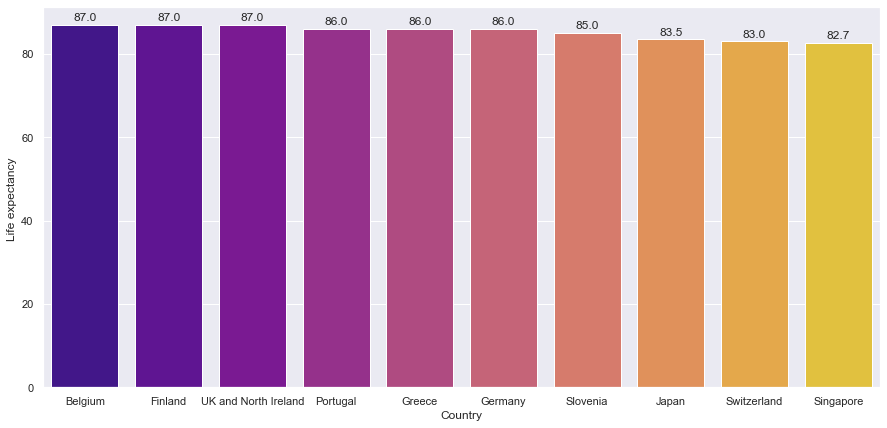

In [69]:
sorted_data = data_2013.sort_values('Life expectancy ', ascending=False).iloc[:10]

sns.set(style="darkgrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=sorted_data, x='Country', y='Life expectancy ', palette='plasma')

for index, value in enumerate(sorted_data['Life expectancy ']):
    plt.text(index, value + 1, str(value), ha='center')

# The last ten countries with the lowest life expectancy in 2013

C:\Users\hi\AppData\Local\Temp\ipykernel_11812\4275863629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_data_desc, x='Country', y='Life expectancy ', palette='plasma')


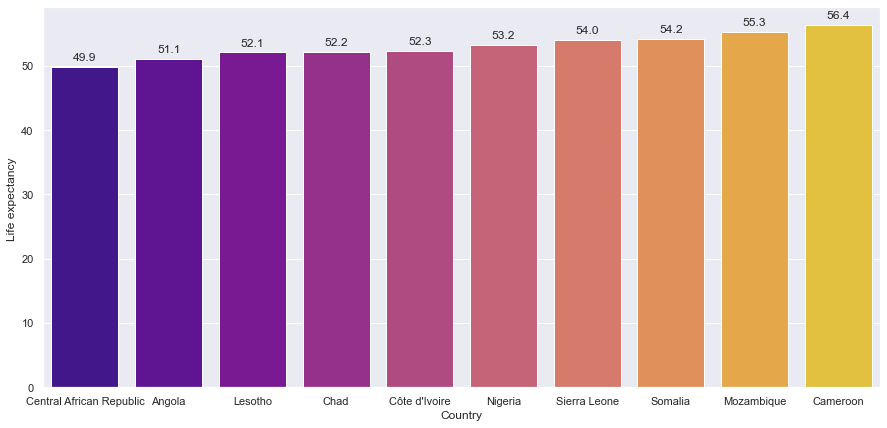

In [70]:
sorted_data_desc = data_2013.sort_values('Life expectancy ').iloc[:10]

sns.set(style="darkgrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=sorted_data_desc, x='Country', y='Life expectancy ', palette='plasma')

for index, value in enumerate(sorted_data_desc['Life expectancy ']):
    plt.text(index, value + 1, str(value), ha='center')

### Plot explanation:
##### these two plots shows the first and last ten countries in terms of 'Life expectancy'. As it is clear most of the countries with a high life expectancy are European countries and those with low life expectancy are African countries.

##### Part b:
##### i. Investigate the relationship between Status (Developed vs. Developing) and the prevalence of a disease (for example, "Hepatitis B" vaccination rates).

##### We will investigate the relationship between status and prevalence of "Hepatits B" (_Two sample t-test_)
##### $H_0: \mu_{developed} = \mu_{developing}$
##### $H_1: \mu_{developed} \neq \mu_{developing}$

C:\Users\hi\AppData\Local\Temp\ipykernel_11812\3347968487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Hepatitis B', palette='plasma')


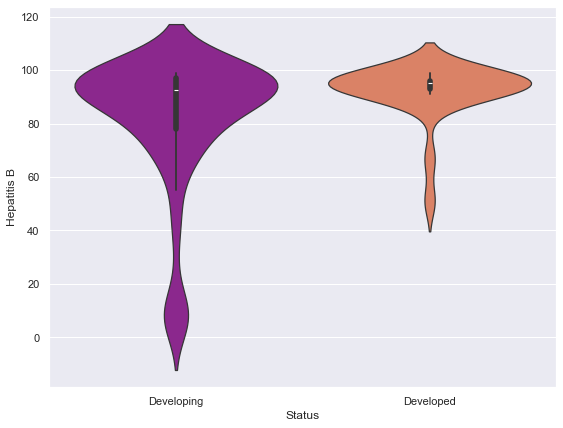

In [71]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Hepatitis B', palette='plasma')
plt.show()

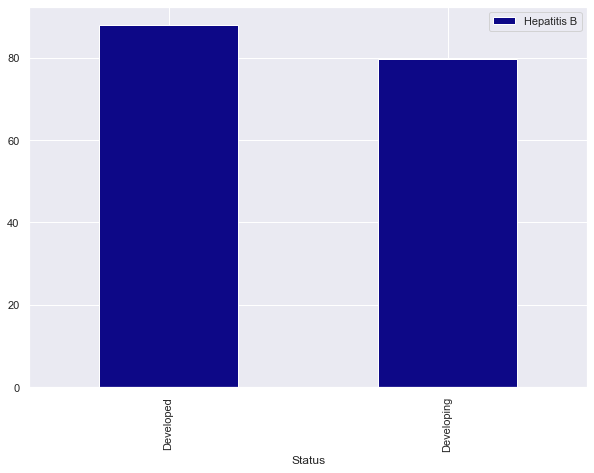

In [72]:
data2 = data.copy()
data2 = data2.drop(columns=['Country'])
data2.groupby('Status').mean().plot(kind='bar', y='Hepatitis B', figsize=(10, 7), colormap='plasma')
plt.show()

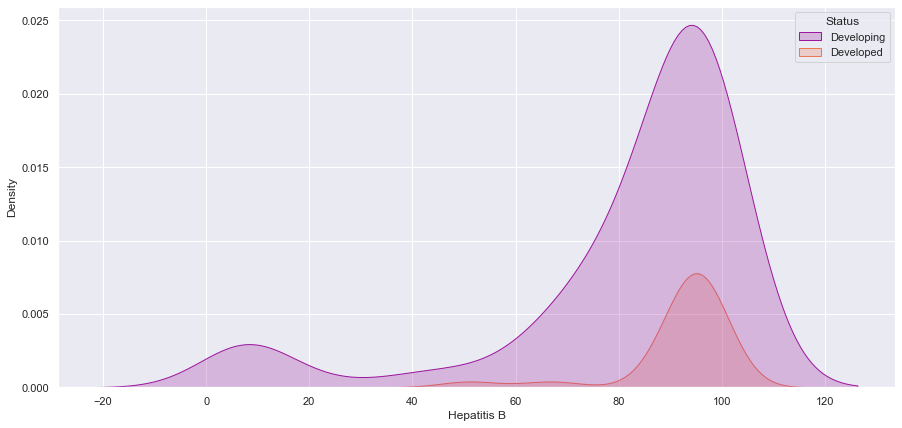

In [73]:
plt.figure(figsize=(15, 7))
sns.kdeplot(data=data_2013, x="Hepatitis B", hue="Status", fill=True, palette='plasma')
plt.show()

In [74]:
alpha = 0.05
stat, p_value = stats.ttest_ind(data_2013[data_2013['Status'] == 'Developed']['Hepatitis B'].dropna(), data_2013[data_2013['Status'] == 'Developing']['Hepatitis B'].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 0.05325713745511049
The null hypothesis will be accepted!


##### As a result of this test we can say that status of a country (developed or developing) has not significant effect on the prevalence of Hepatitis B. And due to the density plot of prevalence of Hepatitis B in both groups it seems we can trust on the result of our test.

##### Part b:
##### ii. Compare the life expectancy ("Life expectancy") between two groups defined by the "Status" column (Developed vs. Developing countries).
##### (_Two sample t-test_) 
##### $H_0: \mu_{developed} = \mu_{developing}$
##### $H_1: \mu_{developed} \neq \mu_{developing}$

C:\Users\hi\AppData\Local\Temp\ipykernel_11812\2200567271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Life expectancy ', palette='plasma')


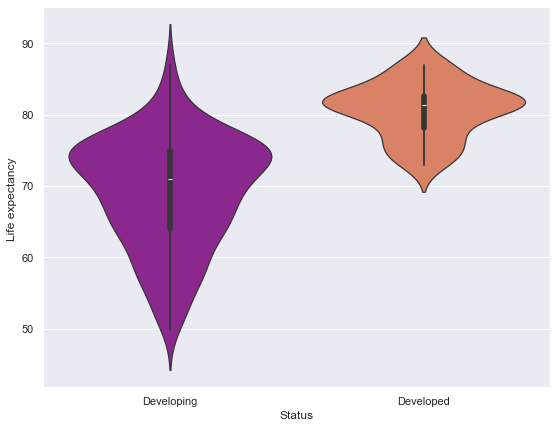

In [75]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Life expectancy ', palette='plasma')
plt.show()

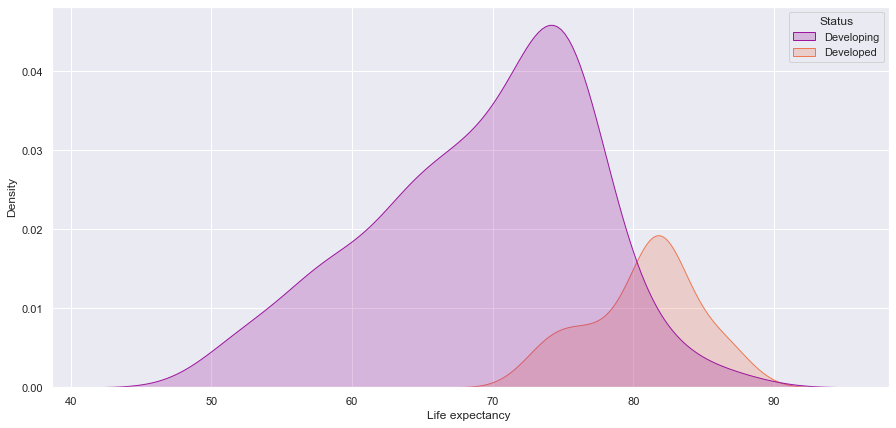

In [76]:
plt.figure(figsize=(15, 7))
sns.kdeplot(data=data_2013, x="Life expectancy ", hue="Status", fill=True, palette='plasma')
plt.show()

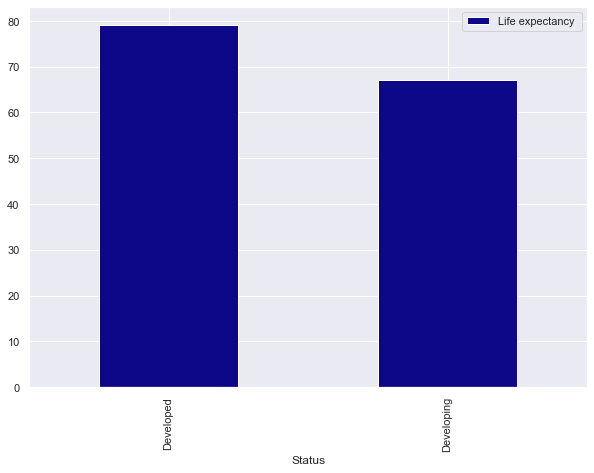

In [77]:
data2 = data.copy()
data2 = data2.drop(columns=['Country'])
data2.groupby('Status').mean().plot(kind='bar', y='Life expectancy ', figsize=(10, 7), colormap='plasma')
plt.show()

In [78]:
alpha = 0.05
stat, p_value = stats.ttest_ind(data_2013[data_2013['Status'] == 'Developed']['Life expectancy '].dropna(), data_2013[data_2013['Status'] == 'Developing']['Life expectancy '].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 5.775206655515912e-14
The null hypothesis will be rejected!


##### Against the previous test this the result of this test shows that life expectancy of each couuntry is significantly affected by its status (developed or developing). The plots also demonstrate the same result.

##### Part b:
##### iii. Compare the life expectancy ("Life expectancy") across multiple groups defined by the "Year" column.(_ANOVA_)
##### $H_0: \mu_{2000} = \mu_{2001} = \dots = \mu_{2015}$
##### $H_1: \mu_{2000} \neq \mu_{2001} \neq \dots \neq \mu_{2015}$

C:\Users\hi\AppData\Local\Temp\ipykernel_11812\1112383808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data, x='Year', y='Life expectancy ', palette='plasma')


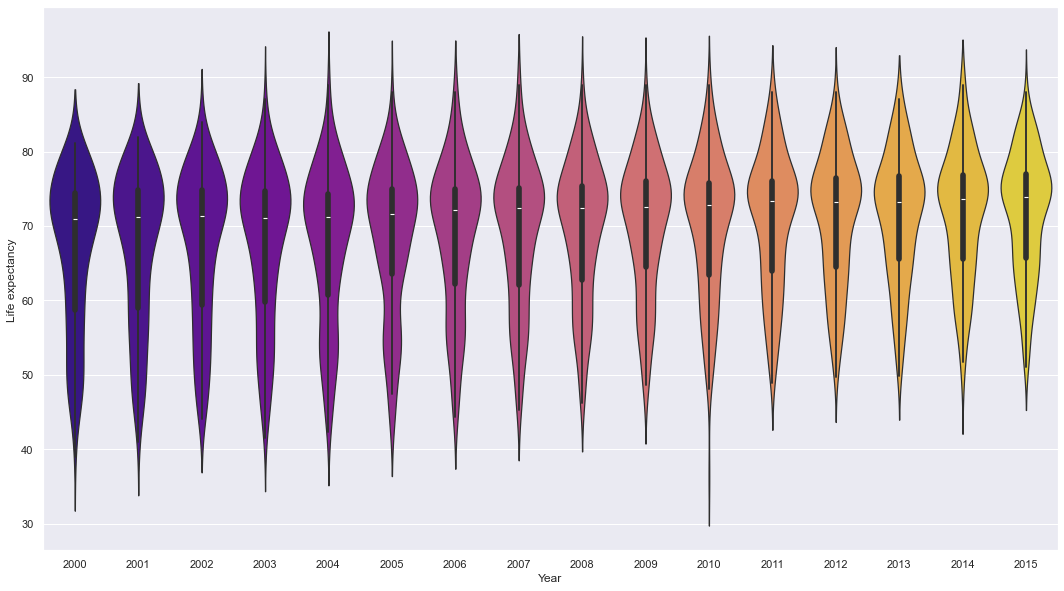

In [79]:
plt.figure(figsize=(40, 10))
plt.subplot(121), sns.violinplot(data=data, x='Year', y='Life expectancy ', palette='plasma')
plt.show()

In [80]:
alpha = 0.05
stat, p_value = stats.f_oneway(data[data['Year'] == 2000]['Life expectancy '].dropna(), data[data['Year'] == 2001]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2002]['Life expectancy '].dropna(), data[data['Year'] == 2003]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2004]['Life expectancy '].dropna(), data[data['Year'] == 2005]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2006]['Life expectancy '].dropna(), data[data['Year'] == 2007]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2008]['Life expectancy '].dropna(), data[data['Year'] == 2009]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2010]['Life expectancy '].dropna(), data[data['Year'] == 2011]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2012]['Life expectancy '].dropna(), data[data['Year'] == 2013]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2014]['Life expectancy '].dropna(), data[data['Year'] == 2015]['Life expectancy '].dropna())
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 4.508349816377376e-12
The null hypothesis will be rejected!


##### The result of this test says that the average life expectancy around the world science 2000 to 2015 are not equal. Due to the violon plot of the distribution of life expectancy in each year and the line plot we have drawn in next part it is obvious thaat the average life expectancy has been growing.

##### Part b:
##### iv. Design 2 more hypothesis tests to further explore the dataset.

##### 1. Investigate if schooling has effect on condumption of Alcohol.
##### $H_0: \mu_{high\_educated} = \mu_{low\_educated}$
##### $H_1: \mu_{high\_educated} \neq \mu_{low\_educated}$

In [81]:
high_educated = data_2013[data_2013['Schooling'] > 12.1]
low_educated = data_2013[data_2013['Schooling'] <= 12.1]
print(high_educated.shape)
print(low_educated.shape)

(114, 22)
(66, 22)


C:\Users\hi\AppData\Local\Temp\ipykernel_11812\983876482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_educated['Dataset'] = 'High'
C:\Users\hi\AppData\Local\Temp\ipykernel_11812\983876482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_educated['Dataset'] = 'Low'
C:\Users\hi\AppData\Local\Temp\ipykernel_11812\983876482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for 

<Axes: xlabel='Dataset', ylabel='Alcohol'>

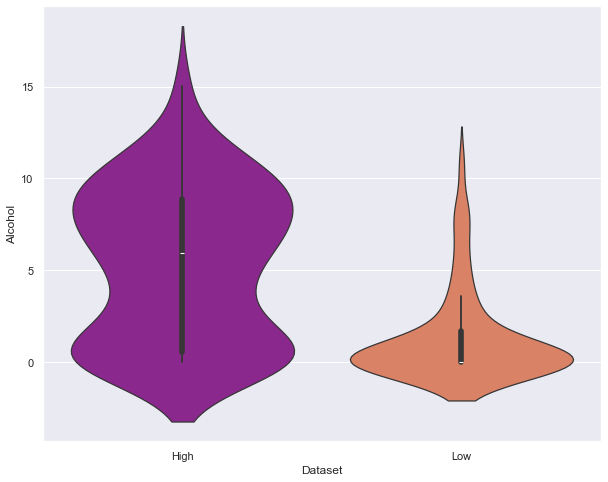

In [82]:
high_educated['Dataset'] = 'High'
low_educated['Dataset'] = 'Low'
merged_df = pd.concat([high_educated, low_educated])
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(x='Dataset', y='Alcohol', data=merged_df, palette='plasma')

In [83]:
alpha = 0.05
stat, p_value = stats.ttest_ind(high_educated['Alcohol'].dropna(), low_educated['Alcohol'].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 2.203408074557782e-11
The null hypothesis will be rejected!


##### In this test we have investigated the effect of education level on the monsumption of alcohol that the result of the test tells us that there is a significant difference between these two grouops (educated and uneducated). By looking at the plots it is clear that consumption of alcoholic baverages are significantly more in educated countries.

##### 2. How does the life expectancy affect the population of country.
##### $H_0: \mu_{high\_le} = \mu_{low\_le}$
##### $H_1: \mu_{high\_le} \neq \mu_{low\_le}$

In [84]:
high_le = data_2013[data_2013['Life expectancy '] > 72.1]
low_le = data_2013[data_2013['Life expectancy '] <= 72.1]
print(high_le.shape)
print(low_le.shape)

(99, 22)
(84, 22)


C:\Users\hi\AppData\Local\Temp\ipykernel_11812\1965333935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_le['Dataset'] = 'High'
C:\Users\hi\AppData\Local\Temp\ipykernel_11812\1965333935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_le['Dataset'] = 'Low'
C:\Users\hi\AppData\Local\Temp\ipykernel_11812\1965333935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

<Axes: xlabel='Dataset', ylabel='Population'>

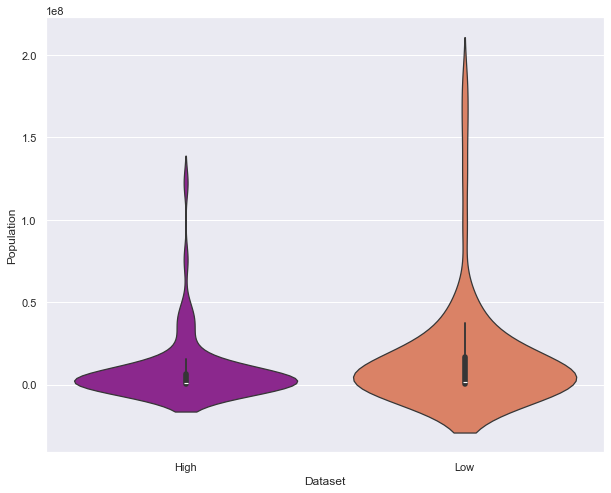

In [85]:
high_le['Dataset'] = 'High'
low_le['Dataset'] = 'Low'
merged_df = pd.concat([high_le, low_le])
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(x='Dataset', y='Population', data=merged_df, palette='plasma')

In [86]:
alpha = 0.05
stat, p_value = stats.ttest_ind(high_le['Population'].dropna(), low_le['Population'].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 0.08691728718845994
The null hypothesis will be accepted!


##### In this test we wanted to see which group of countries are more populated? But infortunatelly the result of the test tells ud that we can not speak about that definitely.

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

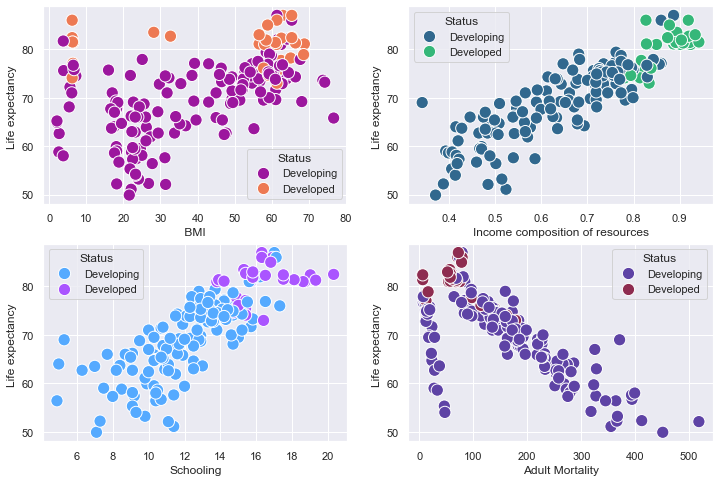

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(data=data_2013, x=' BMI ', y='Life expectancy ', hue='Status', ax=axs[0][0], palette='plasma', s=150)
sns.scatterplot(data=data_2013, x='Schooling', y='Life expectancy ', ax=axs[1][0], hue='Status', palette='cool', s=150)
sns.scatterplot(data=data_2013, x='Income composition of resources', y='Life expectancy ', hue='Status', ax=axs[0][1], palette='viridis', s=150)
sns.scatterplot(data=data_2013, x='Adult Mortality', y='Life expectancy ', hue='Status', ax=axs[1][1], palette='twilight', s=150)

<Axes: xlabel='Year', ylabel='Adult Mortality'>

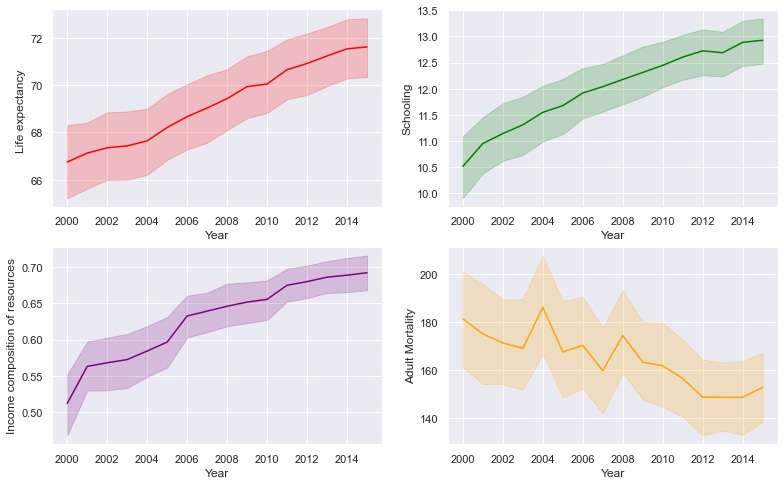

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(13, 8))

sns.lineplot(data=data, x='Year', y='Life expectancy ', ax=axs[0][0], color='red')
sns.lineplot(data=data, x='Year', y='Schooling', ax=axs[0][1], color='green')
sns.lineplot(data=data, x='Year', y='Income composition of resources', ax=axs[1][0], color='purple')
sns.lineplot(data=data, x='Year', y='Adult Mortality', ax=axs[1][1], color='orange')

##### Using these for plots we can see that some factores such as "Income composition of resources", "Schooling" are highly correlated with the life expectancy and as we see the average amount of all of these three factores have grown over 15 years. And also we can see "Adult mortality" that has negative correlation eith life expectancy and by increasing the average of life expectancy around the world the average of adult mortality has decreased.

# Part c:
### Calculate the correlation between each variable and the target variable ("Life expectancy")

<Axes: >

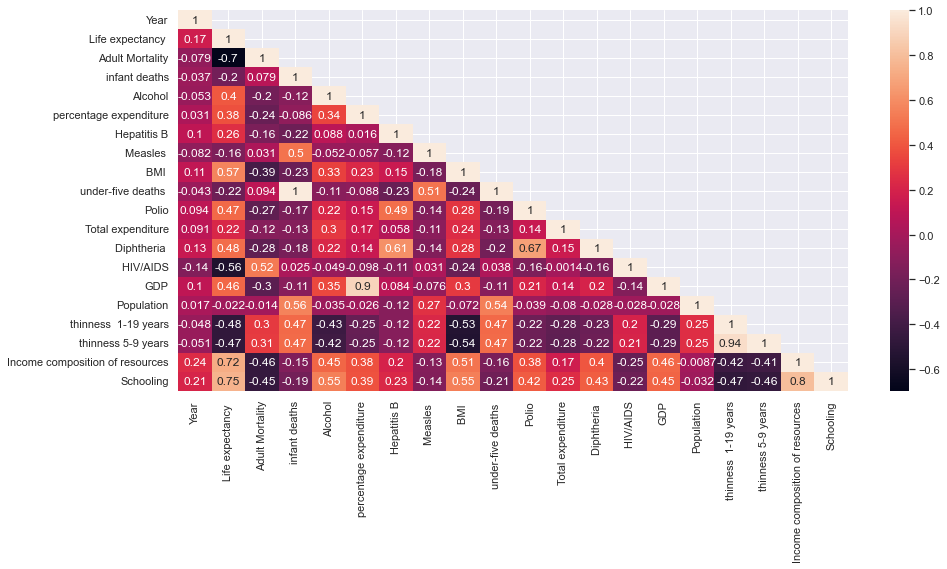

In [89]:
corr_matrix = data.select_dtypes(include='number').corr()
plt.figure(figsize=(15, 7))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_))
sns.heatmap(corr_matrix, annot=True, cmap='rocket')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

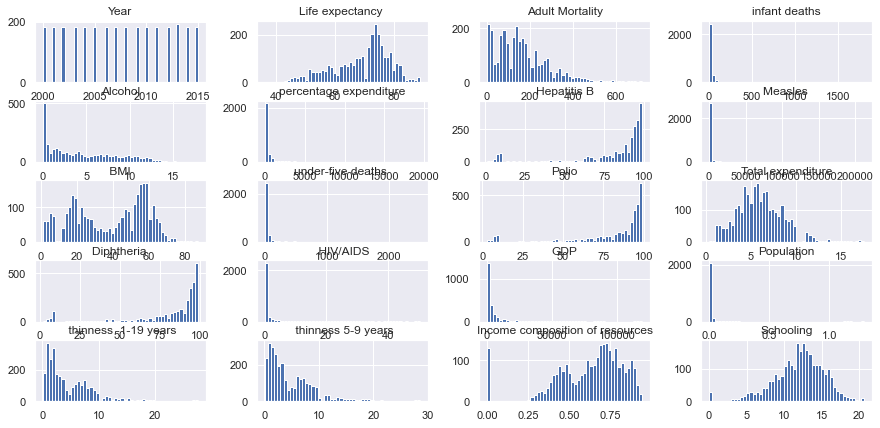

In [90]:
data.hist(bins=50, figsize=(15, 7))

# Part d:
### Test-train split your dataset such that there are no countries in both test and train splits. Now train two linear regression models, one including the column "Country" and another one with this column removed. How did it affect your model performance on test split? Which approach is correct?
# And Part e:
### Now test-train split the dataset randomly and perform the previous steps. How did the results change? Compare these results to part d. Which approach is correct?

In [91]:
from sklearn import metrics

def model_train_test(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_test, y_test_pred)
    r_squared_train = metrics.r2_score(y_train, y_train_pred)
    r_squared_test = metrics.r2_score(y_test, y_test_pred) 

    print('train_data report:')
    print('MSE: ', end='')
    print(mse_train)
    print('R_squared: ', end='')
    print(r_squared_train)

    print('test_data report:')
    print('MSE: ', end='')
    print(mse_test)
    print('R_squared: ', end='')
    print(r_squared_test)

    print('Coeficients: ')
    print(model.coef_)

In [92]:
# omitting outlier

def z_score_outlier(data):
    drop_outliers = np.array([])
    for column in data.columns:
        if (not data[column].dtype == 'object'):
            upper_bound = data[column].mean() + 3 * data[column].std()
            lower_bound = data[column].mean() - 3 * data[column].std()
            data = data.loc[(data[column] < upper_bound) & (data[column] > lower_bound)]

    return data

In [93]:
no_country_data = data.drop(columns=['Country'])
country_data = data.copy()

In [94]:
# encoding categorical data (country_data)
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()

countries = pd.DataFrame(data['Country'], columns=['Country'])
countries = oh_encoder.fit_transform(countries).toarray()
newCountry = pd.DataFrame(countries, columns=oh_encoder.categories_, index=country_data.index)
country_data = country_data.drop(columns=['Country'])
country_data = pd.concat([country_data, newCountry], axis=1)
newCountry.rename(columns=''.join, inplace=True)

status = pd.DataFrame(country_data['Status'], columns=['Status'])
status = oh_encoder.fit_transform(status).toarray()
newStatus = pd.DataFrame(status, columns=oh_encoder.categories_, index=country_data.index)
country_data = country_data.drop(columns=['Status'])
country_data = pd.concat([country_data, newStatus], axis=1)
country_data.rename(columns=''.join, inplace=True)
country_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Democratic People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,Niue,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,UK and North Ireland,Uganda,Ukraine,United Arab Emirates,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [95]:
# encoding categorical data (no_country_data)

no_country_data = no_country_data.drop(columns=['Status'])
no_country_data = pd.concat([no_country_data, newStatus], axis=1)
no_country_data.rename(columns=''.join, inplace=True)
no_country_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


In [96]:
column = country_data.pop('Life expectancy ')
country_data.insert(214, 'Life expectancy ', column)

column = no_country_data.pop('Life expectancy ')
no_country_data.insert(21, 'Life expectancy ', column)

In [97]:
# splitting trian-test
from sklearn.model_selection import train_test_split

country_train, country_test = train_test_split(country_data, train_size=0.8, random_state=42)
print(country_train.shape)
print(country_test.shape)

no_country_train, no_country_test = train_test_split(no_country_data, train_size=0.8, random_state=42)
print(no_country_train.shape)
print(no_country_test.shape)

(2350, 215)
(588, 215)
(2350, 22)
(588, 22)


In [98]:
# Imputing null values
from sklearn.impute import SimpleImputer

country_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
no_country_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
country_train = pd.DataFrame(country_mean_imputer.fit_transform(country_train), columns=country_train.columns, index=country_train.index)
no_country_train = pd.DataFrame(no_country_mean_imputer.fit_transform(no_country_train), columns=no_country_train.columns, index=no_country_train.index)

In [99]:
country_test = pd.DataFrame(country_mean_imputer.transform(country_test), columns=country_test.columns, index=country_test.index)
no_country_test = pd.DataFrame(no_country_mean_imputer.transform(no_country_test), columns=no_country_test.columns, index=no_country_test.index)

In [100]:
print(country_train.isnull().sum())
print(no_country_train.isnull().sum())

Year                      0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
                         ..
Zambia                    0
Zimbabwe                  0
Developed                 0
Developing                0
Life expectancy           0
Length: 215, dtype: int64
Year                               0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0


# Training model on randomly separated data

# Simple linear regression model

In [101]:
# scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

no_country_scaler = MinMaxScaler()
country_scaler = MinMaxScaler()

scaled_country_train = country_scaler.fit_transform(country_train)
scaled_country_test = country_scaler.transform(country_test)

no_country_train = no_country_scaler.fit_transform(no_country_train)
no_country_test = no_country_scaler.transform(no_country_test)

In [102]:
# data including country without scaling
c_train_x = country_train.drop(columns=['Life expectancy '])
c_train_y = country_train['Life expectancy ']
c_test_x = country_test.drop(columns=['Life expectancy '])
c_test_y = country_test['Life expectancy ']

# scaled data without country
nc_train_x = no_country_train[:, :-1]
nc_train_y = no_country_train[:, -1]
nc_test_x = no_country_test[:, :-1]
nc_test_y = no_country_test[:, -1]

# scaled data including country
sc_train_x = scaled_country_train[:, :-1]
sc_train_y = scaled_country_train[:, -1]
sc_test_x = scaled_country_test[:, :-1]
sc_test_y = scaled_country_test[:, -1]

In [103]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [104]:
# training simple linear model on data including country without scaling
model_train_test(c_train_x, c_train_y, c_test_x, c_test_y, linear_reg) 

train_data report:
MSE: 3.3630817541936877
R_squared: 0.9631580348746207
test_data report:
MSE: 3.059478783254317
R_squared: 0.9646855650925339
Coeficients: 
[ 2.65406024e-01 -2.27421059e-03  7.89011603e-02 -7.33809736e-02
  1.36626411e-04 -4.47250015e-03 -9.99281928e-06 -5.12708506e-03
 -5.78455045e-02  3.09910964e-03 -4.72632026e-02  7.45569434e-03
 -3.20996798e-01 -1.40196229e-05 -1.12137855e-09  2.14029498e-02
  3.11198666e-02 -1.67610380e-01  1.47268697e-01 -9.59984094e+00
  7.08578254e+00  4.86511798e+00 -1.62364548e+01  7.82857173e+00
  6.80555744e+00  5.37572339e+00  1.99739889e+00  2.37543761e+00
  2.44972517e+00  6.80179014e+00  7.06798969e+00  1.78039288e-01
  6.33458901e+00  2.55109518e+00  1.67840364e+00  1.60773427e+00
 -9.35738449e+00 -2.72786912e+00  3.62785826e-02  8.10445476e+00
 -6.27606432e+00  4.48786296e+00  7.56829226e+00 -5.64150688e+00
 -9.72970228e+00 -1.04027643e+01  4.35247374e+00 -3.36058094e+00
 -1.07814372e+01  1.33865079e+01 -1.53432159e+01 -1.42248635e+

In [105]:
# training simple linear model on data without country
model_train_test(nc_train_x, nc_train_y, nc_test_x, nc_test_y, linear_reg)

train_data report:
MSE: 0.005990050259893984
R_squared: 0.8177543969620992
test_data report:
MSE: 0.005498468560817924
R_squared: 0.8237343073308296
Coeficients: 
[ 2.20324630e-03 -2.74946841e-01  3.29929579e+00  1.51277816e-02
  3.16550896e-02 -3.40035467e-02 -8.96236283e-02  6.33586326e-02
 -3.42662976e+00  4.93132291e-02  8.79177256e-03  7.47607283e-02
 -4.41159137e-01  6.17823632e-02 -1.45075370e-02 -4.57016830e-02
  5.29444109e-03  1.16361254e-01  2.45380901e-01  1.69848621e+13
  1.69848621e+13]


In [106]:
# training simple linear model on scaled data including country
model_train_test(sc_train_x, sc_train_y, sc_test_x, sc_test_y, linear_reg)

train_data report:
MSE: 0.0012112849436437016
R_squared: 0.9631469945280587
test_data report:
MSE: 5.356057226595046e+21
R_squared: -1.717003792199648e+23
Coeficients: 
[ 7.54087889e-02 -3.12192053e-02  2.69355801e+00 -2.43241514e-02
  4.95264399e-02 -8.04158025e-03 -4.09423530e-02 -8.82548415e-03
 -2.74083553e+00  5.86243042e-03 -1.51593000e-02  1.36554237e-02
 -3.07718059e-01 -3.05973520e-02 -2.73354783e-02  1.10998349e-02
  1.65672454e-02 -2.56575497e-03  5.76133282e-02 -1.52556769e+11
 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11
 -1.52556769e+11 -1.52556769e+11 -3.02660746e+11 -3.02660746e+11
 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11
 -1.52556769e+11 -1.52556769e+11 -3.02660746e+11 -1.52556769e+11
 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11
 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11 -3.02660746e+11
 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11
 -1.52556769e+11 -1.52556769e+11 -1.52556769e+11 -1

# Simple linear regression model using Stochastic Gradient Descent (SGD)

##### As we saw in the last part using LinearRegression class we can not reach a proper model on the data including country so we decided to use SGDRegressor class which uses stochastic gradient descent algorithm to train model.

In [107]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1)

In [108]:
# training SGD on scaled data including country and randomly separated
model_train_test(sc_train_x, sc_train_y, sc_test_x, sc_test_y, sgd_reg)

train_data report:
MSE: 0.00303500329171774
R_squared: 0.9076608740957537
test_data report:
MSE: 0.003182398234632151
R_squared: 0.8979811154738807
Coeficients: 
[ 1.28646364e-02 -2.15914836e-01 -1.05027649e-02  1.24755378e-02
  2.77557567e-02 -2.29585435e-02 -3.89086347e-02  6.41334015e-02
 -2.36406299e-02  5.11490938e-02  1.31967529e-02  6.52047242e-02
 -3.10499831e-01  5.02082287e-02  8.05980423e-03 -3.33869912e-02
 -2.48278627e-02  1.46154566e-01  2.20885613e-01 -1.22549580e-02
  1.84821838e-02  2.19588493e-02 -1.18463916e-01  1.01023284e-01
 -1.04405554e-02  2.03782036e-02 -1.09060779e-02  2.99346940e-02
  6.80641816e-03  1.32366971e-02  1.20098194e-02  5.41433666e-02
  5.00774853e-03 -2.82276129e-02  1.29780598e-02 -2.50864331e-02
 -4.56279185e-02  6.11160710e-02 -3.14386013e-02  7.93337338e-02
 -6.77055453e-02  2.77255477e-06  3.09697745e-02 -4.47708964e-02
 -2.91658808e-02 -4.63571573e-02  4.92090529e-02  9.82174933e-03
 -8.14447883e-02  4.35832089e-02 -6.00093165e-02 -6.647320

In [109]:
# training SGD on data without country and randomly separated
model_train_test(nc_train_x, nc_train_y, nc_test_x, nc_test_y, sgd_reg)

train_data report:
MSE: 0.006354283275904649
R_squared: 0.8066727093686545
test_data report:
MSE: 0.005959807537390782
R_squared: 0.8089450558580877
Coeficients: 
[-0.00113824 -0.30724104 -0.012729    0.00569009  0.04104921 -0.03304837
 -0.04999487  0.07366404 -0.03035122  0.05815164  0.0151701   0.08572319
 -0.37632267  0.04877186  0.01247594 -0.02398881 -0.01175366  0.15355671
  0.21489824  0.13451266  0.10444441]


# Training SGD regression on selectively separated data.

In [110]:
c_test_selected = country_data.head(545)
c_train_selected = country_data.iloc[545:]
nc_test_selected = no_country_data.head(545)
nc_train_selected = no_country_data.iloc[545:]

print(c_train_selected.shape)
print(c_test_selected.shape)

(2393, 215)
(545, 215)


In [111]:
print(nc_train_selected.shape)
print(nc_test_selected.shape)

(2393, 22)
(545, 22)


In [112]:
cs_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ncs_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

nc_train_selected = pd.DataFrame(ncs_mean_imputer.fit_transform(nc_train_selected), columns=nc_train_selected.columns, index=nc_train_selected.index)
nc_test_selected = pd.DataFrame(ncs_mean_imputer.transform(nc_test_selected), columns=nc_test_selected.columns, index=nc_test_selected.index)

c_train_selected = pd.DataFrame(cs_mean_imputer.fit_transform(c_train_selected), columns=c_train_selected.columns, index=c_train_selected.index)
c_test_selected = pd.DataFrame(cs_mean_imputer.transform(c_test_selected), columns=c_test_selected.columns, index=c_test_selected.index)

In [113]:
cs_scaler = MinMaxScaler()
ncs_scaler = MinMaxScaler()

c_train_selected = cs_scaler.fit_transform(c_train_selected)
c_test_selected = cs_scaler.transform(c_test_selected)

nc_train_selected = ncs_scaler.fit_transform(nc_train_selected)
nc_test_selected = ncs_scaler.transform(nc_test_selected)

In [114]:
c_train_selected_x = c_train_selected[:, :-1]
c_train_selected_y = c_train_selected[:, -1]
c_test_selected_x = c_test_selected[:, :-1]
c_test_selected_y = c_test_selected[:, -1]

nc_train_selected_x = nc_train_selected[:, :-1]
nc_train_selected_y = nc_train_selected[:, -1]
nc_test_selected_x = nc_test_selected[:, :-1]
nc_test_selected_y = nc_test_selected[:, -1]

In [115]:
# training SGD on data including country and selectively separated
model_train_test(c_train_selected_x, c_train_selected_y, c_test_selected_x, c_test_selected_y, sgd_reg)

train_data report:
MSE: 0.0025297754975169276
R_squared: 0.9177089273973712
test_data report:
MSE: 0.009773157002879793
R_squared: 0.7532130516098566
Coeficients: 
[ 1.21313503e-02 -1.78947217e-01 -5.04332746e-03  7.19402402e-03
  1.98594054e-02 -1.24668883e-02 -3.40807370e-02  6.08523049e-02
 -1.84479321e-02  4.24718579e-02  3.30371752e-02  5.23878206e-02
 -3.06563537e-01  4.26399282e-02  1.10577059e-02 -4.63317371e-02
 -3.24236327e-02  1.50807451e-01  2.34299041e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0000

In [116]:
# training SGD on data that does not include country and selectively sparated
model_train_test(nc_train_selected_x, nc_train_selected_y, nc_test_selected_x, nc_test_selected_y, sgd_reg)

train_data report:
MSE: 0.006256538456913189
R_squared: 0.7964810470714359
test_data report:
MSE: 0.00788548997858261
R_squared: 0.8008794898309693
Coeficients: 
[-0.00428128 -0.2808251  -0.00388662  0.00295124  0.01721244 -0.0305698
 -0.0444532   0.06656245 -0.02334444  0.04835348  0.02808637  0.07599343
 -0.37704115  0.06001886  0.02471596 -0.04635602 -0.02422208  0.16213057
  0.22775078  0.13216686  0.09924334]


# Conclusion for part d and e:

### In this exercise we had two datasets one including 'Country' column and another one with this column removed. In exercise d we were supposed to split these two data such that there are no countries in both train and test data. Then we have trained linear regression model on each data using two classes (LinearRegression and SGDRegressor). Below you will see the results (just results for SGDRegressor):
1. Data including country:<br>
$MSE = 0.009$<br>
$R^2 = 0.75$
2. Data that does not include country:<br>
$MSE = 0.007$<br>
$R^2 = 0.80$
### And in part e we splited data randomly and did the same thing. The results are as follow:
1. Data including country:<br>
$MSE = 0.003$<br>
$R^2 = 0.89$
2. Data that does not include country:<br>
$MSE = 0.005$<br>
$R^2 = 0.80$

### So we can say that it is better to remove the column 'Country' because as we see the model that has been trained with this column has little efficiency in predicting new countries. In part e the results of our model are the best but it seems it is not proper to predict a Life expectancy of a new country but, for example if we are suppose to predict a life expectancy of a country (which has been seen by our model befor) in the next year training model on the data including country would be the best approach. And it is clear that spliting data randomly causes to acieve better results.

# Part f:
### Train a simple linear regression model and another one with L1 regularization. Compare the model weights. Explain the results with the correlation values you calculated before.

# Lasso Regression
##### Least Absolute Shrinkage and Selection Operator, is a type of linear regression technique used for feature selection and regularization. It adds a penalty term to the standard least squares objective, which helps to shrink the coefficient estimates towards zero. 
##### The penalty term is as follow:
$\alpha\sum_{i=1}^{n}|w_i|$
##### As term $\alpha$ gets bigger the coefficient of uncorrelated features get closer to zero.

In [117]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=.001)

In [118]:
# lasso regression on data including country and randomly separated
model_train_test(sc_train_x, sc_train_y, sc_test_x, sc_test_y, lasso_reg)

train_data report:
MSE: 0.00638207419174183
R_squared: 0.8058271785306859
test_data report:
MSE: 0.006063981647705716
R_squared: 0.8056055220388519
Coeficients: 
[ 0.00000000e+00 -2.89306486e-01 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  7.80264234e-02
 -0.00000000e+00  4.90098520e-02  0.00000000e+00  7.13647042e-02
 -3.60685013e-01  9.48568545e-03 -0.00000000e+00 -2.80342758e-02
 -0.00000000e+00  1.50878667e-01  2.22091534e-01 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.000000

In [119]:
# lasso regression on data that does not include country and randomly separated
model_train_test(nc_train_x, nc_train_y, nc_test_x, nc_test_y, lasso_reg)

train_data report:
MSE: 0.006570265213196533
R_squared: 0.80010151936202
test_data report:
MSE: 0.006149158102597018
R_squared: 0.8028750005028178
Coeficients: 
[ 0.00000000e+00 -2.93764676e-01 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  7.88807676e-02
 -0.00000000e+00  4.89676807e-02  0.00000000e+00  7.11718515e-02
 -3.55522106e-01  9.02037995e-03 -0.00000000e+00 -2.78073149e-02
 -0.00000000e+00  1.53041761e-01  2.22176418e-01  4.36393882e-02
 -5.45831139e-17]


# Lasso Regression using Stochastic Gradient Descent

In [120]:
SGD_lasso_reg = SGDRegressor(max_iter=1000, penalty='l1', eta0=0.1, alpha=.001)

In [121]:
# lasso regression using SGD on data including country and seperated randomly
model_train_test(sc_train_x, sc_train_y, sc_test_x, sc_test_y, SGD_lasso_reg)

train_data report:
MSE: 0.006584257342234068
R_squared: 0.7996758127512921
test_data report:
MSE: 0.006259170323603413
R_squared: 0.7993483130036932
Coeficients: 
[ 0.         -0.29719431  0.          0.          0.          0.
  0.          0.08853328  0.          0.0479853   0.          0.07067634
 -0.30961051  0.00646845  0.         -0.01447017  0.          0.17304264
  0.20653494  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0. 

In [122]:
# lasso regression using SGD on data that does not include country and seperated randomly
model_train_test(nc_train_x, nc_train_y, nc_test_x, nc_test_y, SGD_lasso_reg)

train_data report:
MSE: 0.006716541589885107
R_squared: 0.7956511015319232
test_data report:
MSE: 0.006325119557725768
R_squared: 0.7972341629808278
Coeficients: 
[ 0.         -0.29883688  0.          0.          0.          0.
  0.          0.08625971  0.          0.05427302  0.          0.07586679
 -0.30922553  0.00573322  0.         -0.01229019  0.          0.17167921
  0.20234044  0.0388725   0.        ]


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data 

##### As we see by setting that in simple linear regression the coefficients of highly correlated features are bigger forexample:
1. Adult mortality $(-0.7)$ (negative correlation)
2. Schooling $(0.72)$
3. Income $(0.75)$

##### The coefficients for mentioned features are of order $10^{-1}$ whereas the others are of order $10^{-2}$ or lower.
##### And we can see in our regularized regression (Lasso regression) the coefficient of other features is aproximately zero.
##### So we can say that lasso regression or generally regularized model will make the coefficient of features that does not have much effect on the prediction of target close to zero and eliminate them.